In [38]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import matplotlib as mpl

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

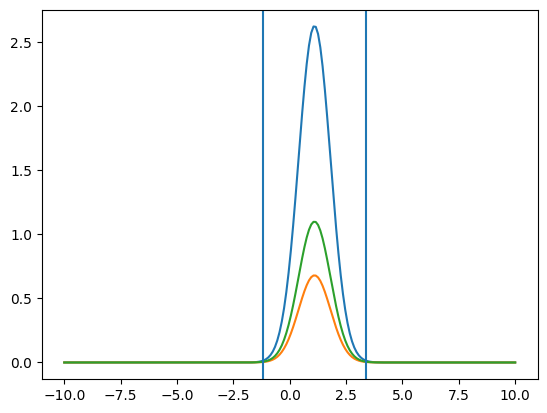

*Extracting Pieces for TH2*
Available Functions:
	Num_Xbins(TH2_) returns number of X bins for a TH2
	Num_Ybins(TH2_) returns number of Y bins for a TH2
	XEdges_2d(TH2_) returns edges of x bins for a TH2
	YEdges_2d(TH2_) returns edges of y bins for a TH2
	Center_Xbins(TH2_) returns center values for x bins for a TH2
	Center_Ybins(TH2_) returns center value for y bins for a TH2
	XY_Values(TH2_) returns a 2D np.array for z values arranged [x][y] for a TH2
	YX_Values(TH2_) returns a 2D np.array for z values arranged [y][x] for a TH2
Enjoy using TH2s

You have access to information regarding all bin numbers, bin maxes, bin mins
Each goes _VAR_max_ min, bins, res, etc. 
All the names of them as well as edges.
Q2_Bin_Name[ 5 ]
W_Bin_Name[ 29 ]
MM1_Bin_Name[ 14 ]
MM2_Bin_Name[ 14 ]
theta_Bin_Name[ 10 ]
alpha_Bin_Name[ 10 ]
phi_Bin_Name[ 10 ]
_var_set_name_ [i]
_Xij_name_[i][j]
Also _mm1_name_ etc. for all Xijs
def Q2_Corr(Q2bin_) corrects the cross section for simulation so far as Q2 is conce

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

In [23]:
#date="06-13-2022"
exp_date="07-26-2024"
sim_date="03-27-2024"
par="pro"
run="e16"
exp_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+exp_date
sim_dir="/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_"+run+"/"+sim_date
#root_file=dir+"/exp_mm_"+par+"_e16_"+date+"_"+SLURM_ID+".root"
root_file_exp=exp_dir+"/exp_"+run+"_clas6_kin_eff_"+par+"_"+exp_date+".root"
root_file_sim=sim_dir+"/sim_"+run+"_clas6_kin_eff_"+par+"_"+sim_date+".root"
xfile=uproot3.open(root_file_exp)
#rfile=uproot3.open(root_file)

In [25]:
xfile[layer1][layer2][layer3][layer4].keys()

[b'kinematic_eff_pro_event_mpim_cut;1', b'kinematic_eff_pro_event_mpim_anti;1']

In [26]:
sel = 1
pid_cut = ["pid","event"]
#top = ["mnone","mall"]
top = ["mnone","mpim"]



layer1 = "Kinematic Efficiency"
layer2 = "kinematic_eff_"+par
layer3 = layer2+"_"+pid_cut[sel]
layer4 = layer3+"_"+top[sel]
layer5 = layer4+"_cut"
hist_names = ['Kinematic_eff_'+par+'_event_cut_sec'+str(sec+1)+'_'+top[sel] for sec in range(6)]
#print(xfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4+"/"+layer5].keys())

if sel ==1:
    layer4 = layer3+"_"+top[sel]
    layer5 = layer4+"_cut"
    xhist = [xfile[layer1][layer2][layer3][layer4][layer5][hist_names[i]] for i in range(6)]
     #rhist = [rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4][i] in range(len(rfile[layer1+"/"+layer2+"/"+layer3+"/"+layer4].keys()))]
else:
    xhist = [xfile[layer1+"/"+layer2+"/"+layer3][i] for i in xfile[layer1+"/"+layer2+"/"+layer3].keys()]
    #rhist = [rfile[layer1+"/"+layer2+"/"+layer3][i] in range(len(rfile[layer1+"/"+layer2+"/"+layer3].keys()))]



In [27]:
cut_cols = ['b','g','r']
cut_name= ["tight","mid","loose"]
data_cols = ['m',"c",'y']

Particle=''
Theta = ''
Momentum = ''
if par == "pro":
    Particle = "Proton"
    Momentum='$p_{P}$'
    Theta = "$\u03B8_{P}$"
elif par == "pip":
    Particle = "$\u03C0^+$"
    Momentum='$p_{\u03C0^+}$'
    Theta = "$\u03B8_{\u03C0^+}$"
elif par == "pim":
    Particle = "$\u03C0^-$"
    Momentum='$p_{\u03C0^-}$'
    Theta = "$\u03B8_{\u03C0^-}$"
elif par == "ele":
    Particle = "Electron"
    #Momentum=r'$p_{e}$'
    #Theta = r'$\u03B8_{e}$'
    Momentum='$p_{e}$'
    Theta = '$\u03B8_{e}$'


xname = Momentum+" (GeV)"
yname=Theta+" (degrees)"


In [29]:
print(xhist)

[<b'TH2F' b'Kinematic_eff_pro_event_cut_sec1_mpim' 0x000308f60db0>, <b'TH2F' b'Kinematic_eff_pro_event_cut_sec2_mpim' 0x000308f61300>, <b'TH2F' b'Kinematic_eff_pro_event_cut_sec3_mpim' 0x000308f61760>, <b'TH2F' b'Kinematic_eff_pro_event_cut_sec4_mpim' 0x000308f61ad0>, <b'TH2F' b'Kinematic_eff_pro_event_cut_sec5_mpim' 0x000308f62390>, <b'TH2F' b'Kinematic_eff_pro_event_cut_sec6_mpim' 0x000308f608b0>]


In [30]:
#Extracting X and Y bins
#X and Y binning is the same for all sectors
xbins=Center_Xbins(xhist[0])
ybins=Center_Ybins(xhist[0])
#Extracting Zvals for 2d histograms
exp_zvals_xy=[XY_Values(xhist[sec]) for sec in range(6)]
exp_zvals_yx=[YX_Values(xhist[sec]) for sec in range(6)]

# sim_zvals_xy=[XY_Values(rhist[sec]) for sec in range(6)]
# sim_zvals_yx=[YX_Values(rhist[sec]) for sec in range(6)]

In [32]:
#Determining Cell Merging 
xmerge=1
ymerge=1

#Merge -> No Zeros
x = Merge_Bins(xbins,xmerge)
y = Merge_Bins(ybins,ymerge)

xedges = Merge_Bin_Edges(XEdges_2d(xhist[0]),xmerge)
yedges = Merge_Bin_Edges(YEdges_2d(xhist[0]),ymerge)
exp_z_xy=[Merge_Z(exp_zvals_xy[i],xmerge,ymerge) for i in range(6)]
exp_z_yx=[Merge_Z(exp_zvals_yx[i],ymerge,xmerge) for i in range(6)]
# sim_z_xy=[Merge_Z(sim_zvals_xy[i],xmerge,ymerge) for i in range(7)]
# sim_z_yx=[Merge_Z(sim_zvals_yx[i],ymerge,xmerge) for i in range(7)]
exp_fit_x = [[Remove_Zeros_X(y,exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
exp_fit_y = [[Remove_Zeros_Y(exp_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]

# sim_fit_x = [[Remove_Zeros_X(y,sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]
# sim_fit_y = [[Remove_Zeros_Y(sim_z_xy[sec][xbin]) for xbin in range(len(x))] for sec in range(6)]


In [33]:
#dumb_x= np.zeros((6,len(x)*len(y)))
#dumb_y= np.zeros((6,len(x)*len(y)))
#dense2 = np.zeros((6,len(x)*len(y)))
xdumb_x= np.zeros((6,len(xbins)*len(ybins)))
xdumb_y= np.zeros((6,len(xbins)*len(ybins)))
xdense2 = np.zeros((6,len(xbins)*len(ybins)))

rdumb_x= np.zeros((6,len(xbins)*len(ybins)))
rdumb_y= np.zeros((6,len(xbins)*len(ybins)))
rdense2 = np.zeros((6,len(xbins)*len(ybins)))
for sec in range(6):
    #for i in range(len(x)):
    for i in range(len(xbins)):
        #for j in range(len(y)):
        for j in range(len(ybins)):
            #dumb_x[sec][i+j*len(x)]+=x[i]
            #dumb_y[sec][i+j*len(x)]+=y[j]
            #dense2[sec][i+j*len(x)]+=zvals_xy[sec][i][j]
            xdumb_x[sec][i+j*len(xbins)]+=xbins[i]
            xdumb_y[sec][i+j*len(xbins)]+=ybins[j]
            xdense2[sec][i+j*len(xbins)]+=exp_zvals_xy[sec][i][j]
            
#             rdumb_x[sec][i+j*len(xbins)]+=xbins[i]
#             rdumb_y[sec][i+j*len(xbins)]+=ybins[j]
#             rdense2[sec][i+j*len(xbins)]+=sim_zvals_xy[sec][i][j]


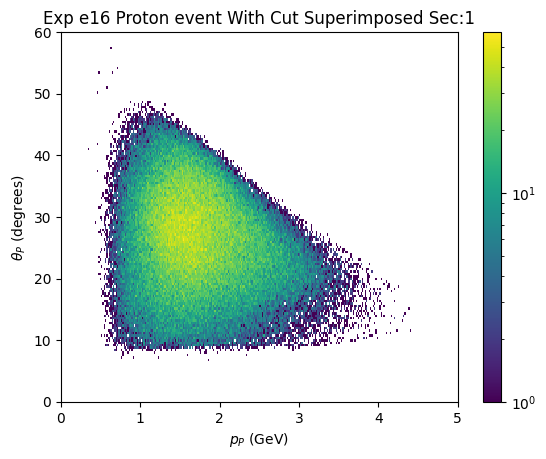

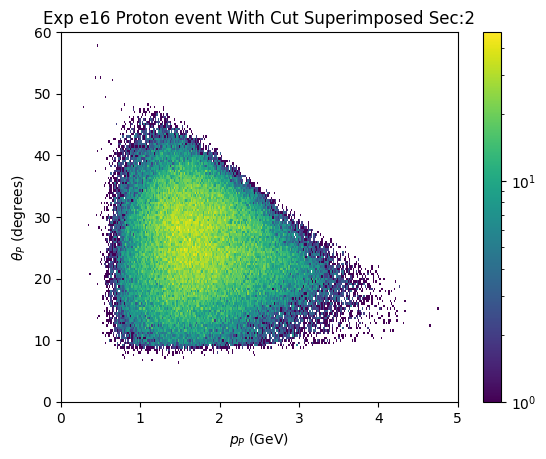

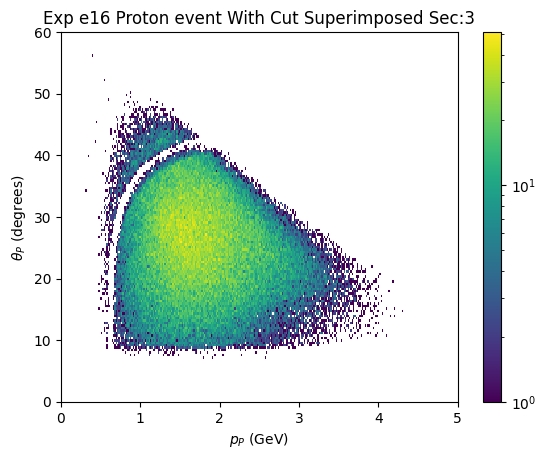

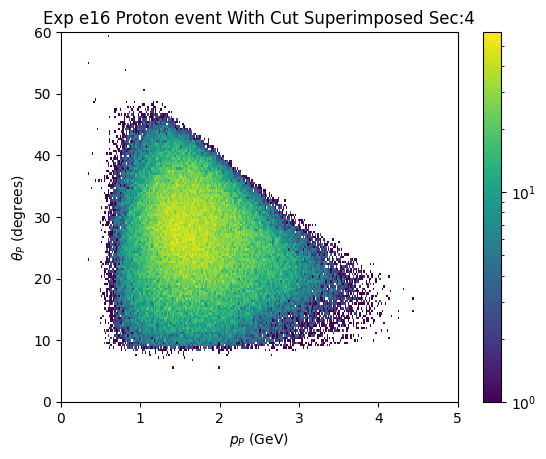

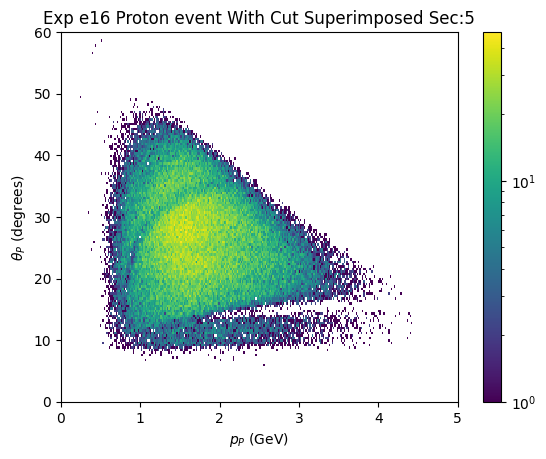

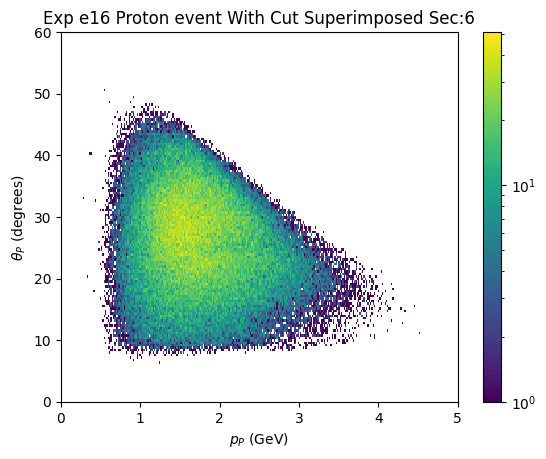

In [40]:
for sec in range(6):
    plt.hist2d(xdumb_x[sec], xdumb_y[sec], bins=(len(x), len(y)), weights=xdense2[sec],norm = mpl.colors.LogNorm())
    if sec==6:
        plt.title("Exp {} {} {} With Cut Superimposed Sec:{}".format(run,Particle,pid_cut[sel],"all"))
    else:
        plt.title("Exp {} {} {} With Cut Superimposed Sec:{}".format(run,Particle,pid_cut[sel],sec+1))
    plt.xlabel(xname)
    plt.ylabel(yname)
    plt.xlim([0.0,5.0])
    plt.ylim([0.0,60.0])
    plt.colorbar()
    plt.show()

In [ ]:
# for sec in range(6):
#     plt.hist2d(rdumb_x[sec], rdumb_y[sec], bins=(len(x), len(y)), weights=rdense2[sec])
#     plt.title("Sim {} {} {} With Cut Superimposed Sec:{}".format(run,Particle,pid_cut[sel],sec+1))
#     plt.xlabel(xname)
#     plt.ylabel(yname)
#     plt.show()

In [41]:
def Integrate(zvals_):
    output = 0.0
    for bin1 in range(len(zvals_)):
        for bin2 in range(len(zvals_[0])):
            output += zvals_[bin1][bin2]
    return output

In [42]:
def Pbin_low(xbin_):
    return round(xedges[xbin_],3)
def Pbin_top(xbin_):
    return round(xedges[xbin_+1],3)

In [43]:
def fit_func1(x_,a_,b_,c_):
    return c_ + a_/(x_-b_)

def fit_func2(x_,a_,b_,c_):
    return c_ + a_*np.log(x_-b_)

def Linear(x_, a_, b_):
    return a_ + b_*x_

In [50]:
#Experimental Cuts First

#Subtractions from all pieces

new_z_xy = np.zeros((6*6,len(x),len(y)))
new_z_yx = np.zeros((6*6,len(y),len(x)))

for sec in range(6):
    for sec2 in range(6):
        for ybin in range(len(y)):
            for xbin in range(len(x)):
                if sec != sec2:
                    if exp_z_xy[sec2][xbin][ybin] < exp_z_xy[sec][xbin][ybin]:
                        new_z_yx[sec+6*sec2][ybin][xbin] = exp_z_yx[sec][ybin][xbin]-exp_z_yx[sec2][ybin][xbin]
                        new_z_xy[sec+6*sec2][xbin][ybin] = exp_z_xy[sec][xbin][ybin]-exp_z_xy[sec2][xbin][ybin]
                    else:
                        new_z_yx[sec+6*sec2][ybin][xbin] = 0.0
                        new_z_xy[sec+6*sec2][xbin][ybin] = 0.0
            





In [51]:
xdumb_x2= np.zeros((6*6,len(xbins)*len(ybins)))
xdumb_y2= np.zeros((6*6,len(xbins)*len(ybins)))
xdense22 = np.zeros((6*6,len(xbins)*len(ybins)))

rdumb_x2= np.zeros((6*6,len(xbins)*len(ybins)))
rdumb_y2= np.zeros((6*6,len(xbins)*len(ybins)))
rdense22 = np.zeros((6*6,len(xbins)*len(ybins)))
for sec in range(6):
    for sec2 in range(6):
    #for i in range(len(x)):
        for i in range(len(xbins)):
            #for j in range(len(y)):
            for j in range(len(ybins)):
                if sec != sec2:
                    #dumb_x[sec][i+j*len(x)]+=x[i]
                    #dumb_y[sec][i+j*len(x)]+=y[j]
                    #dense2[sec][i+j*len(x)]+=zvals_xy[sec][i][j]
                    xdumb_x2[sec+sec2*6][i+j*len(xbins)]+=xbins[i]
                    xdumb_y2[sec+sec2*6][i+j*len(xbins)]+=ybins[j]
                    xdense22[sec+sec2*6][i+j*len(xbins)]+=new_z_xy[sec+sec2*6][i][j]

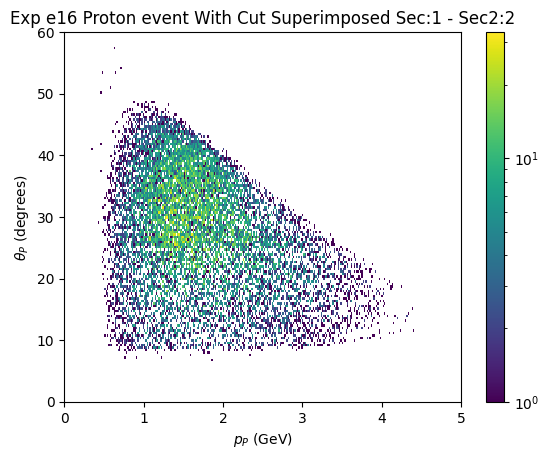

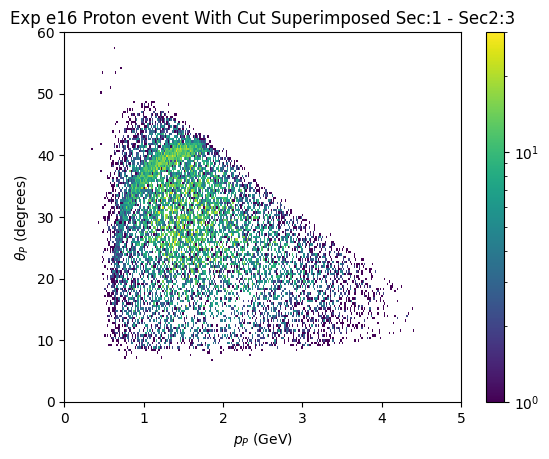

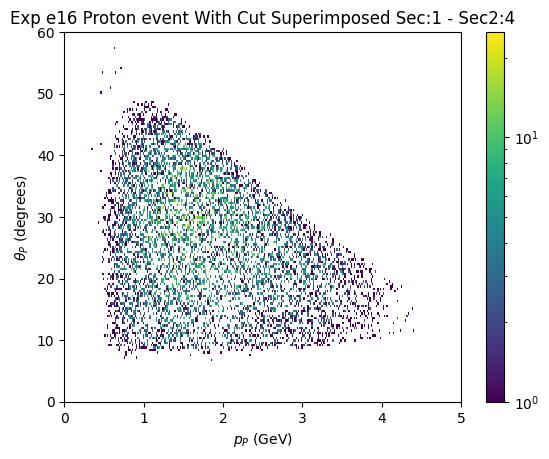

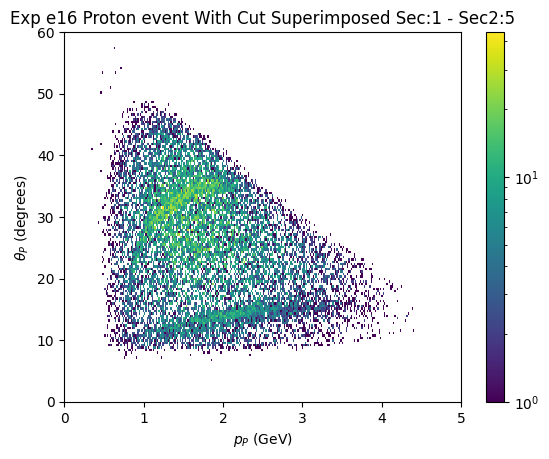

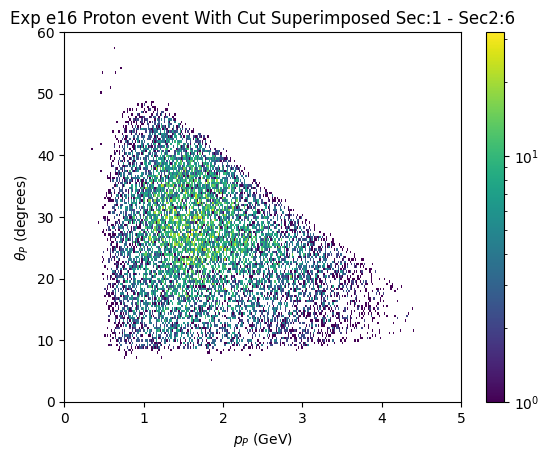

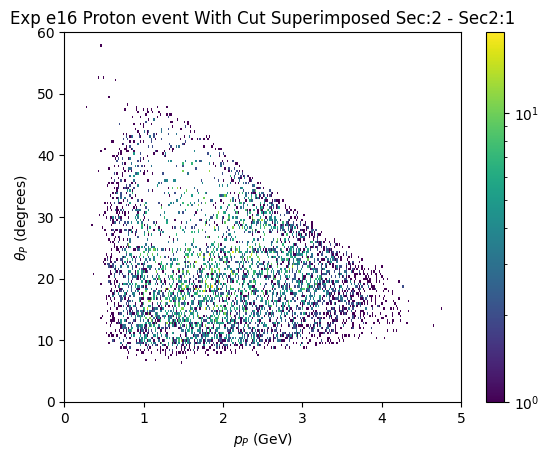

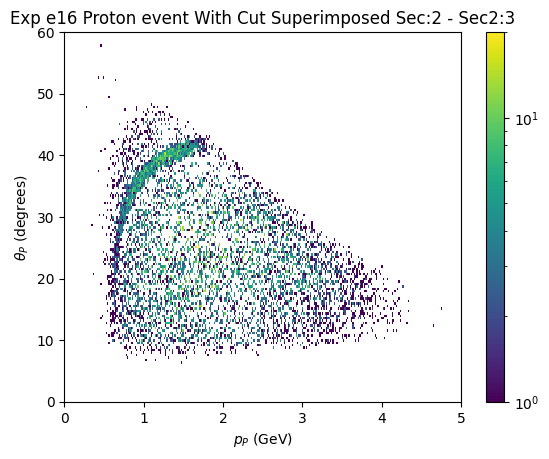

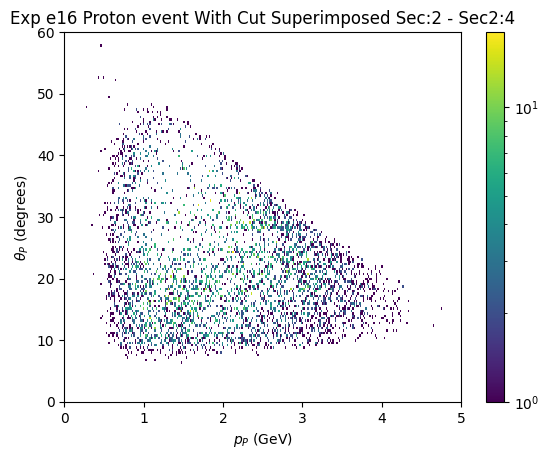

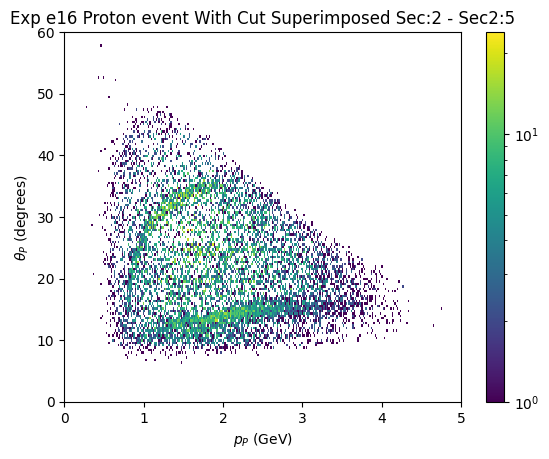

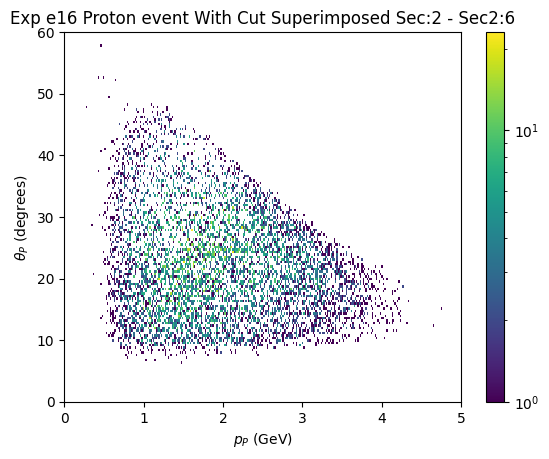

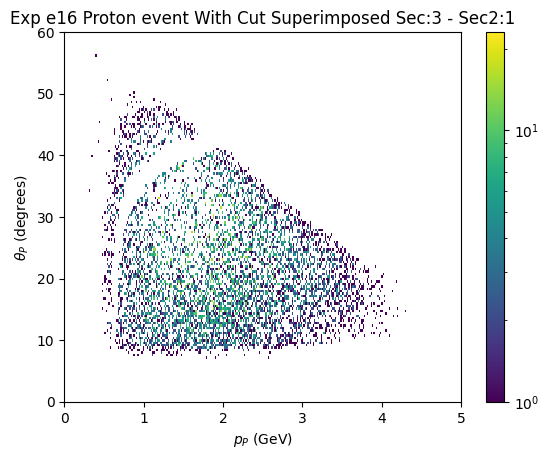

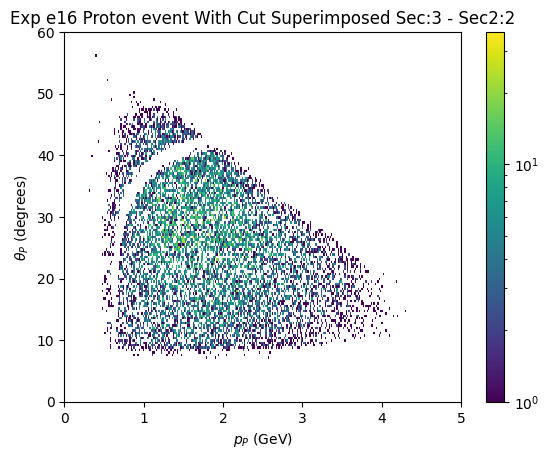

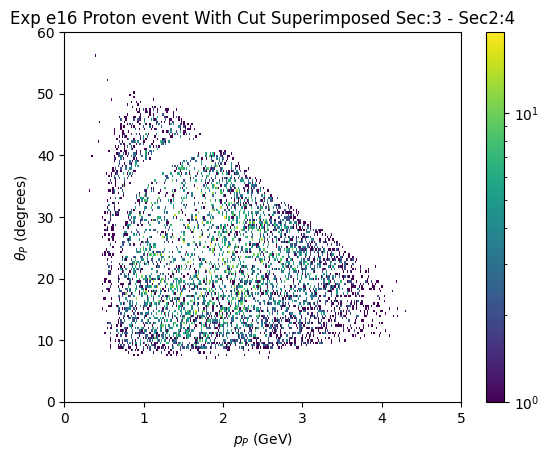

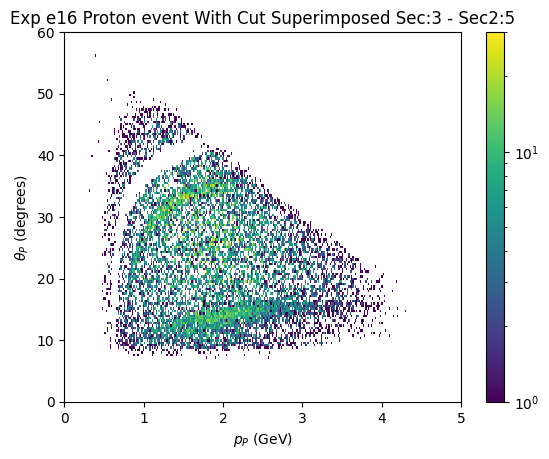

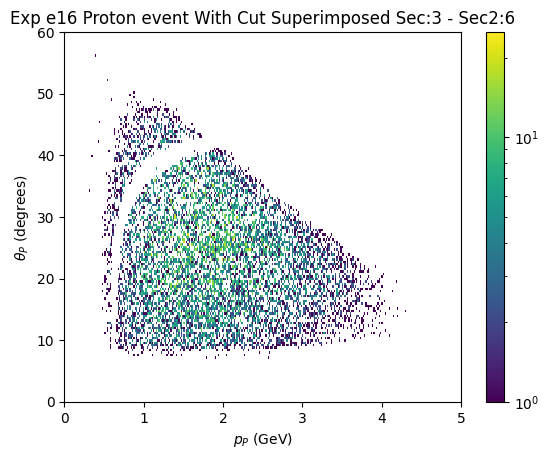

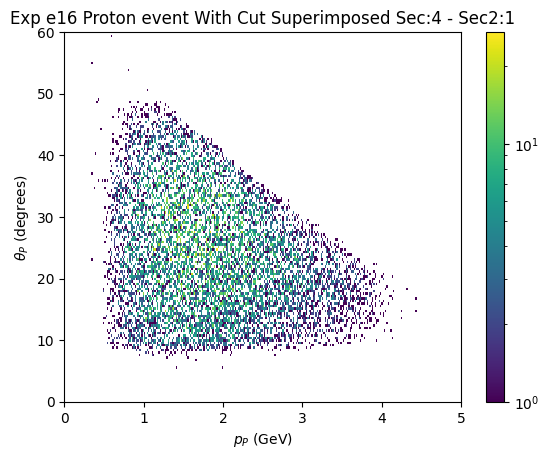

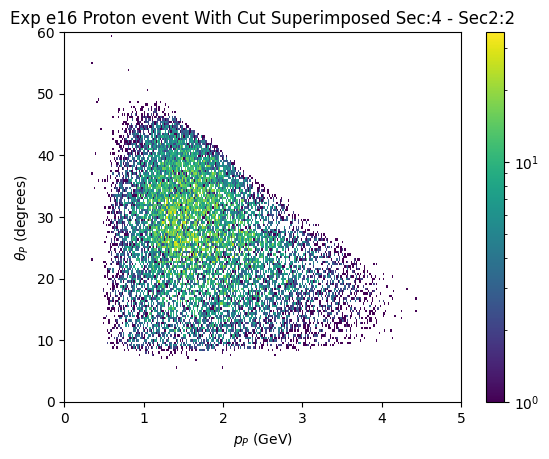

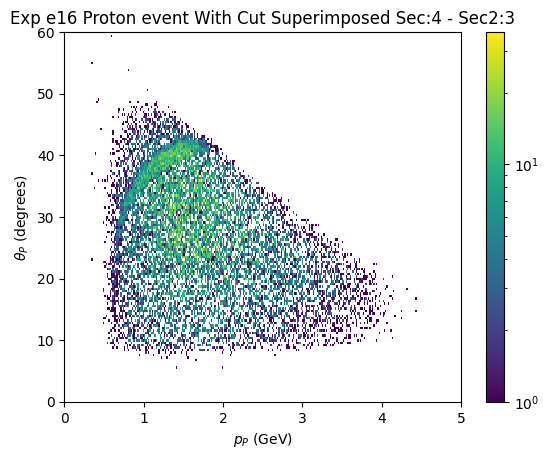

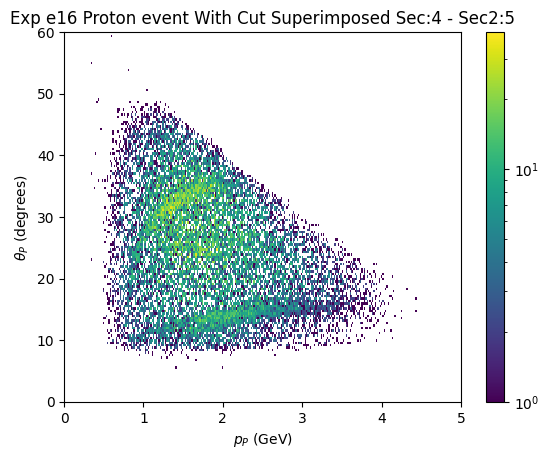

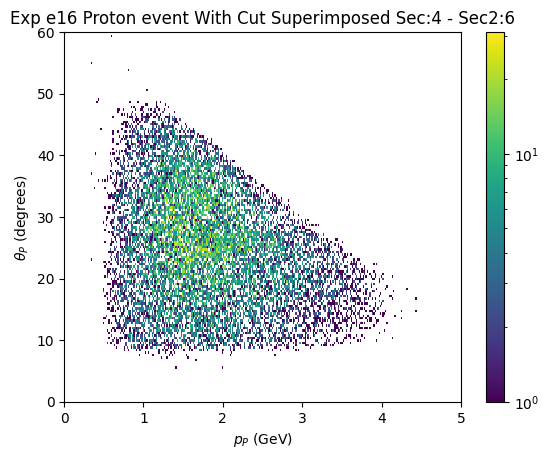

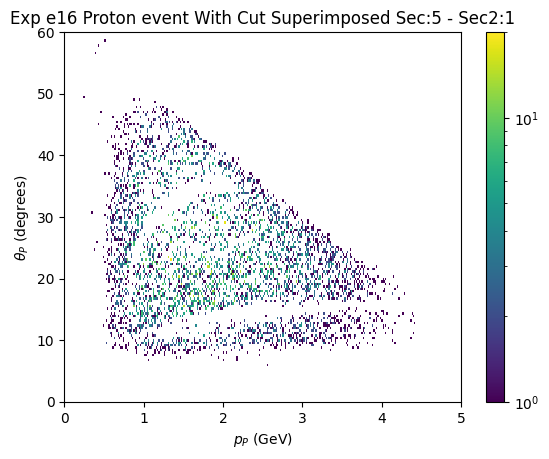

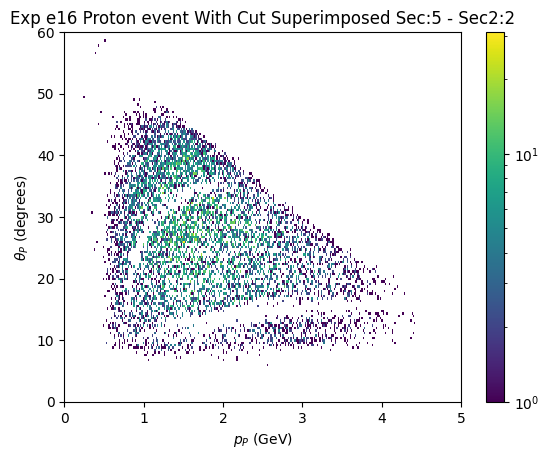

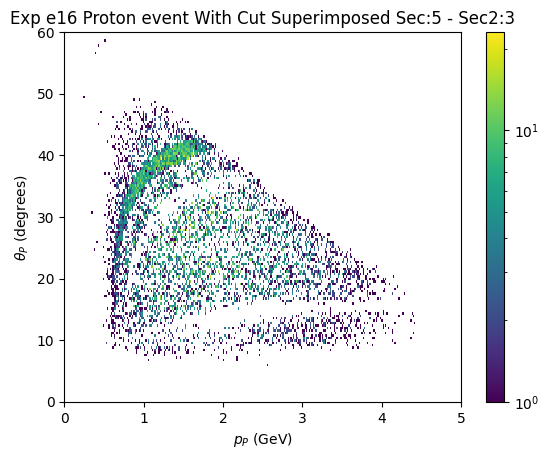

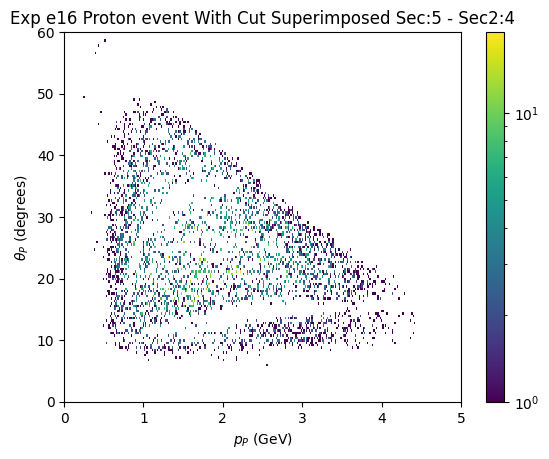

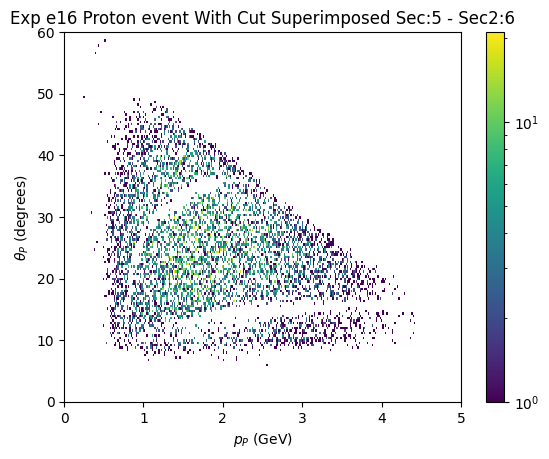

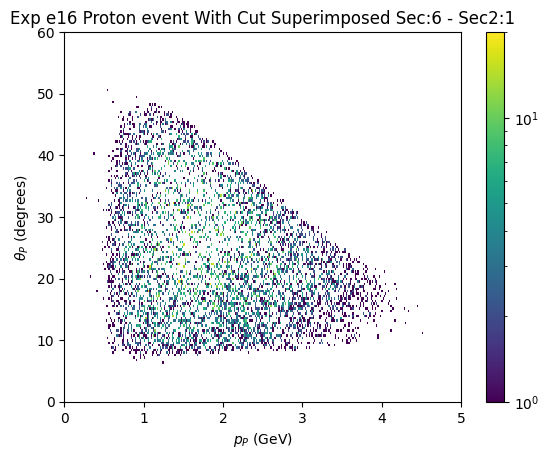

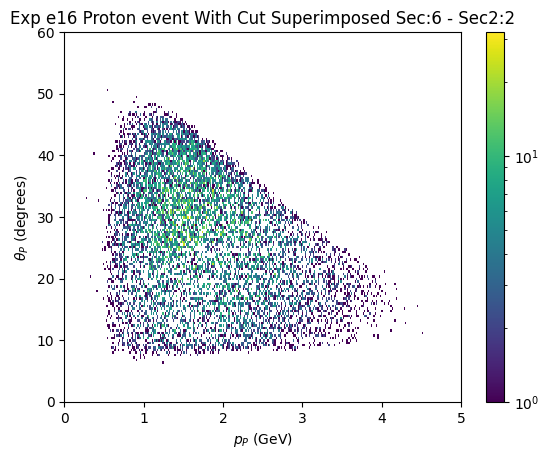

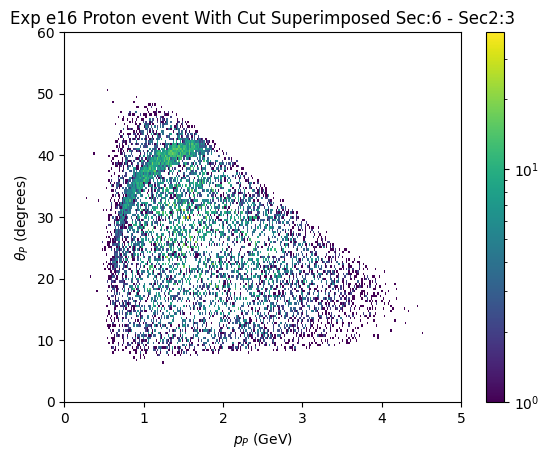

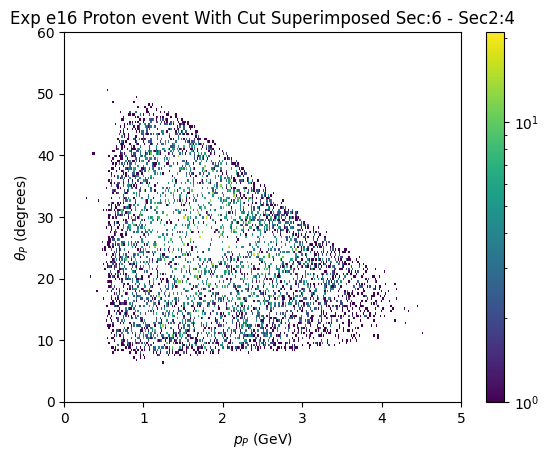

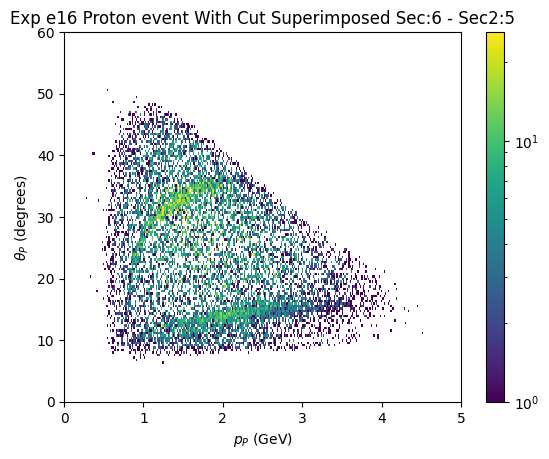

In [52]:
for sec in range(6):
    for sec2 in range(6):
        if sec != sec2:
            plt.hist2d(xdumb_x2[sec+sec2*6], xdumb_y2[sec+sec2*6], bins=(len(x), len(y)), weights=xdense22[sec+6*sec2],norm = mpl.colors.LogNorm())
            if sec==6:
                plt.title("Exp {} {} {} With Cut Superimposed Sec:{} - Sec2:{}".format(run,Particle,pid_cut[sel],"all",sec2+1))
            else:
                plt.title("Exp {} {} {} With Cut Superimposed Sec:{} - Sec2:{}".format(run,Particle,pid_cut[sel],sec+1,sec2+1))
            plt.xlabel(xname)
            plt.ylabel(yname)
            plt.xlim([0.0,5.0])
            plt.ylim([0.0,60.0])
            plt.colorbar()
            plt.show()